# Solution: Use CDF to Calculate Probabilities (Practice)



<p>We will use the <a href="https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv" target="_blank">human height data set:</a></p>
<p>Use the normal cumulative distribution function with the mean and standard deviation of female height to calculate the probability that a female's height is:</p>
<p>1. between 55.0 and 56.0 inches</p>
<p>2. is less than 5 feet (60 in)</p>
<p>3. is greater than the mean (hint: do you know this answer intuitively?)</p>
<p><br></p>
<p>Save your code to your Github repository and submit the link</p>


# Solution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [2]:
# Read in data
df = pd.read_csv("Data/weight-height male-female - weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
# Separate male and female
males = df.loc[ df['Gender'] == 'Male'].copy()
females = df.loc[ df['Gender'] == 'Female'].copy()

In [4]:
# Find mean and standard deviation of female Height
data = females['Height']
mean = np.mean(data)
std = np.std(data)

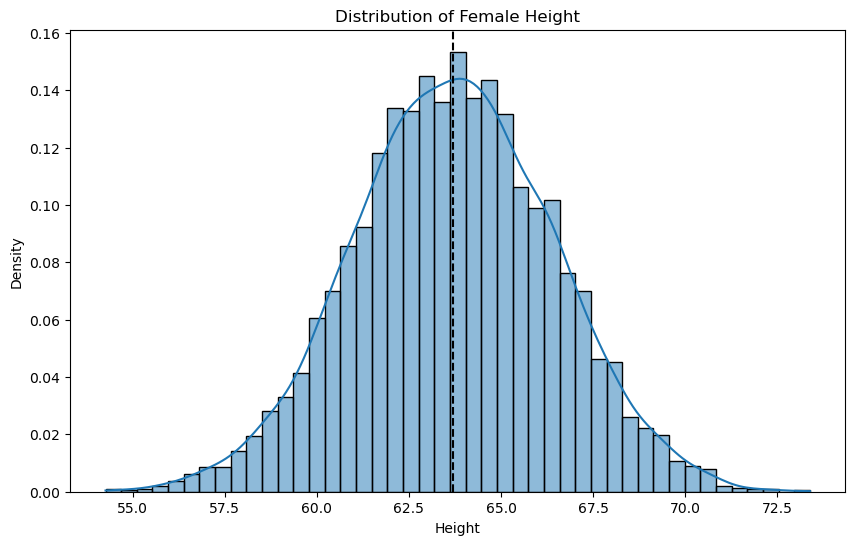

In [5]:
# KDE plot of female human height (note needed, but helpful to see)
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True,cumulative=False)
ax.set_title('Distribution of Female Height')
ax.axvline(mean,color='k',ls='--', label=f"Mean: {mean:.2f}");

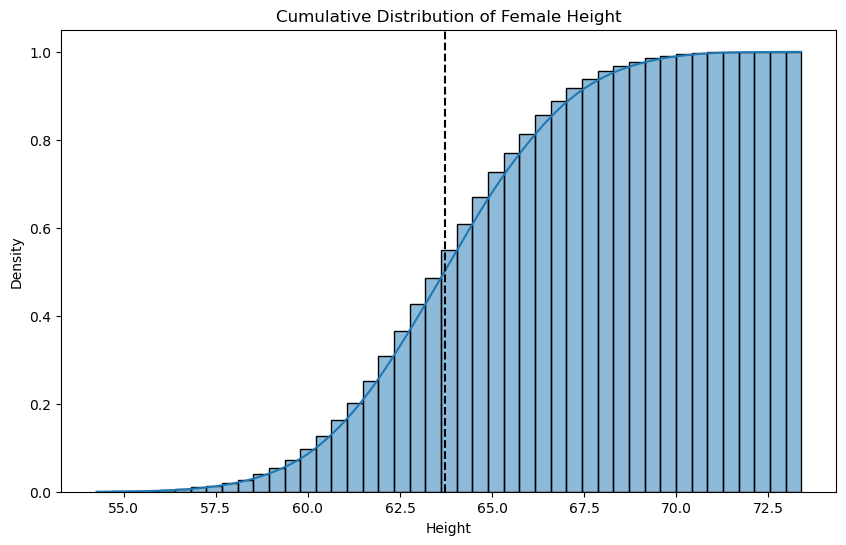

In [6]:
# Cumulative plot of female human height (Not needed, but helpful to see)
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True,cumulative=True)
ax.set_title('Cumulative Distribution of Female Height')
ax.axvline(mean,color='k',ls='--');


### 1) What is the probability female is between 55.0 and 56.0 inches?



In [7]:
# Set the span in question
low_end = 55.0
high_end = 56.0

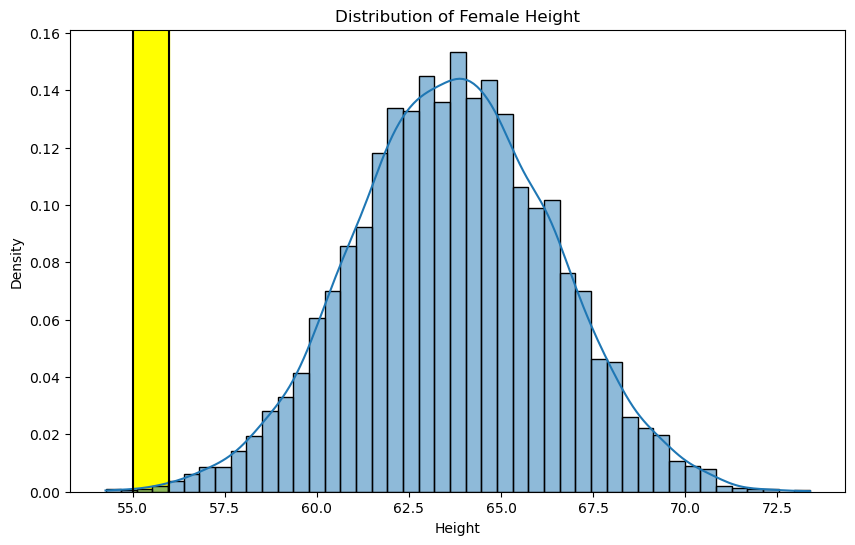

In [8]:
# visual not needed, but helpful to see
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True)
ax.set_title('Distribution of Female Height')
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0);

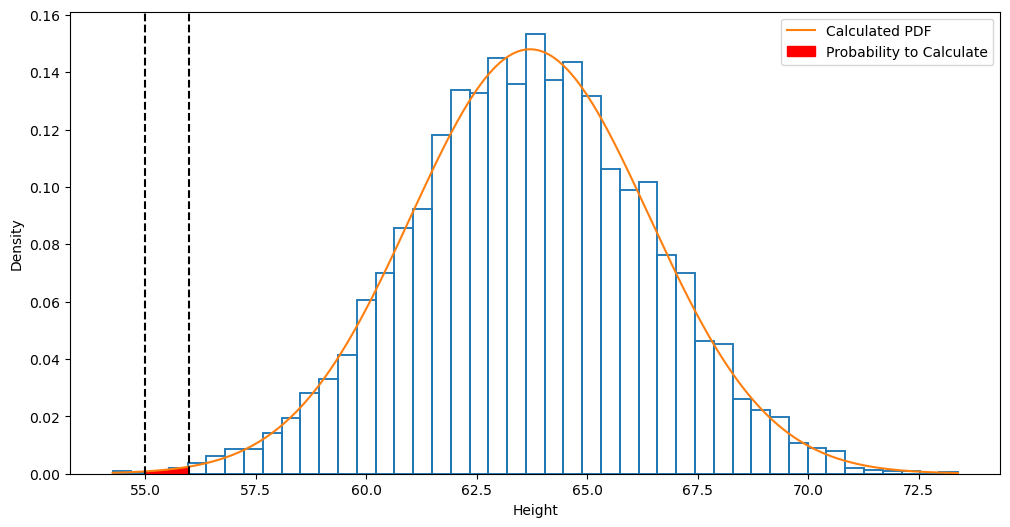

In [9]:
# Visual not needed but helpful to see
# Graphing a normal distribution with our range, std, and mean
min_val = np.min(data)
max_val = np.max(data)
range_vals = np.linspace(min_val, max_val,1000)
pdf = stats.norm.pdf(range_vals,loc=mean,scale=std)
## Plotting the histogram of the data
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, fill=False,stat='density',ax=ax)
ax.plot(range_vals,pdf,label='Calculated PDF')
## annotating the heights to get the prob for
ax.axvline(55,color='k',ls='--')
ax.axvline(56,color='k',ls='--')
ax.fill_between(range_vals,pdf, where=(range_vals>55)&(range_vals<56),
                color='red', label='Probability to Calculate')
ax.legend();

In [10]:
## we can use the  cdf to get the cumulative probability at 70, subtract the cumulative probability at 66
stats.norm.cdf(56, loc=mean,scale=std) - stats.norm.cdf(55,loc=mean, scale=std)

0.0015043054289559897

Question 1 Answer:

The probability of a female height between 55 and 56 inches is .0015 or 0.15%

### 2): What is the probability that female height is less than 5 feet (60 in)?

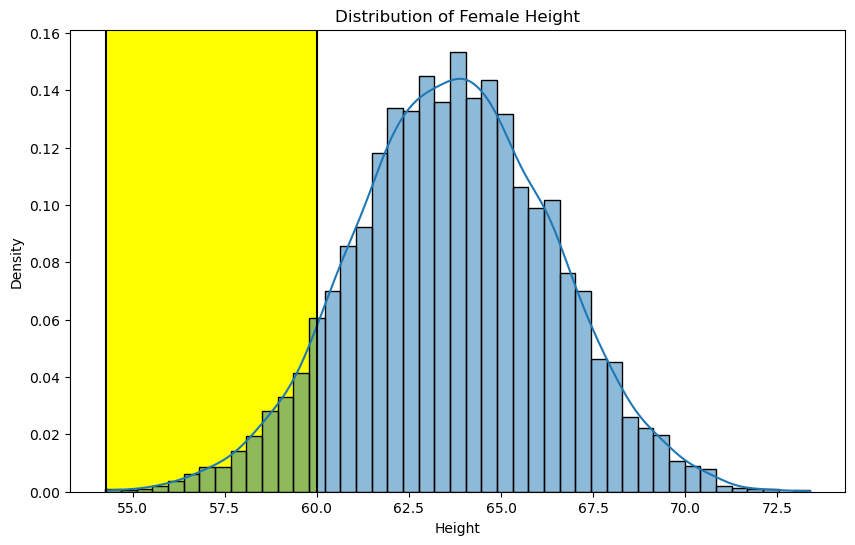

In [11]:
# visual not needed, but helpful to see
low_end = min_val
high_end = 60


fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True)
ax.set_title('Distribution of Female Height')
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0);

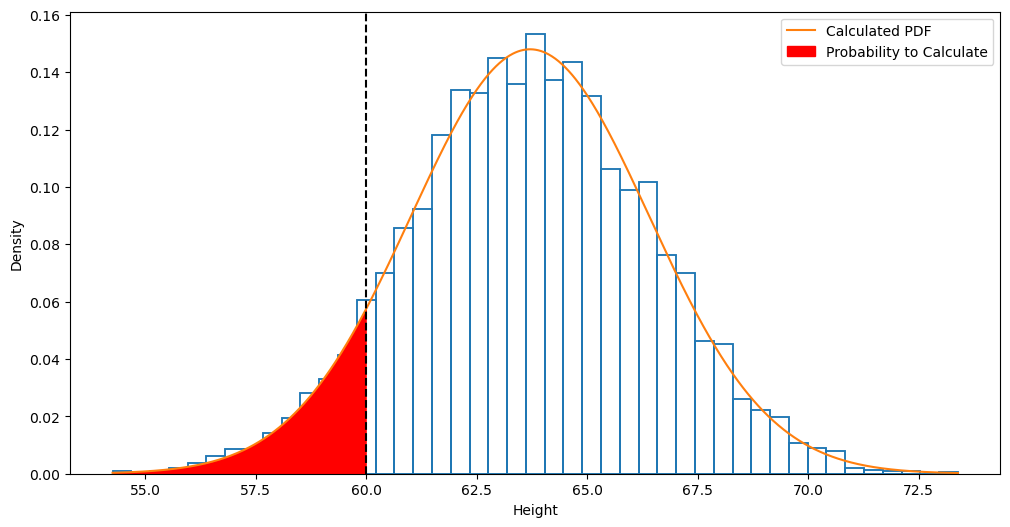

In [12]:
# Visual not needed but helpful to see

pdf = stats.norm.pdf(range_vals,loc=mean,scale=std)
## Plotting the histogram of the data
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, fill=False,stat='density',ax=ax)
ax.plot(range_vals,pdf,label='Calculated PDF')
## annotating the heights to get the prob for
ax.axvline(60,color='k',ls='--')
ax.fill_between(range_vals,pdf, where=(range_vals>min_val)&(range_vals<60),
                color='red', label='Probability to Calculate')
ax.legend();

In [13]:
## to get the probability of 60 inches OR less
prob = stats.norm.cdf(60, loc=np.mean(data), scale= np.std(data))
prob

0.08446492725207488

The answer to question 2 is: The probability that a female is less than 5 feet tall is .084 or 8.4%

### Question 3: What is the probability that the female height is greater than the mean?

The intuitive answer is 50% because half of the population is greater than the mean.

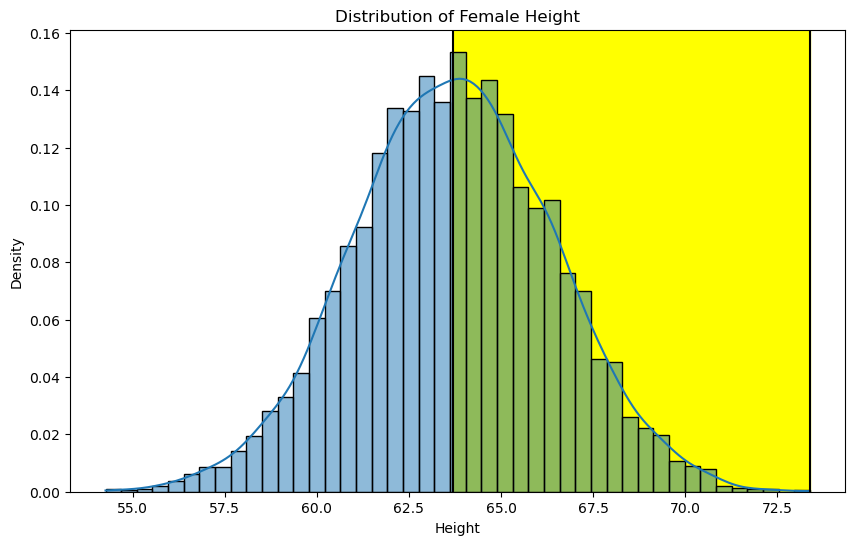

In [14]:
low_end = mean
high_end = max_val

fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True)
ax.set_title('Distribution of Female Height')
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0);

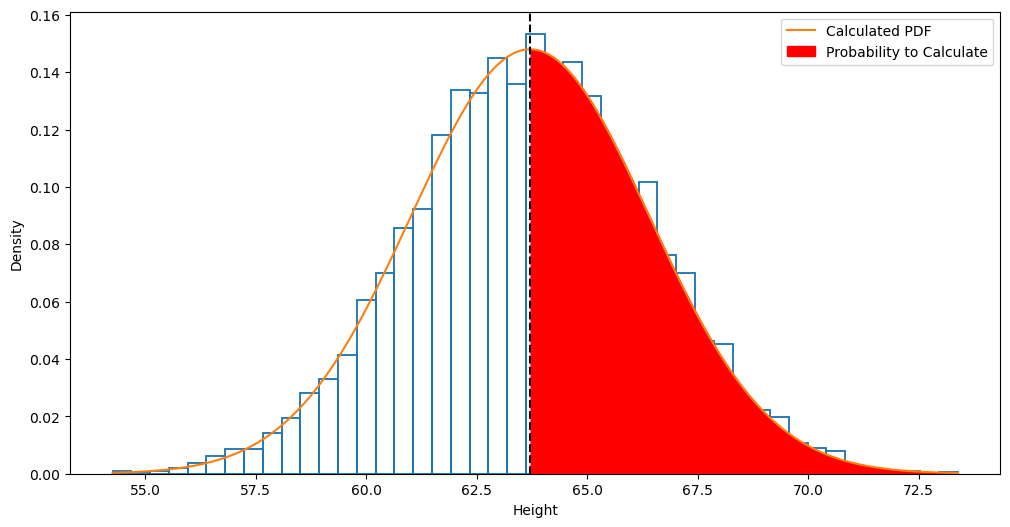

In [15]:

pdf = stats.norm.pdf(range_vals,loc=mean,scale=std)
## Plotting the histogram of the data
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, fill=False,stat='density',ax=ax)
ax.plot(range_vals,pdf,label='Calculated PDF')
## annotating the heights to get the prob for
ax.axvline(mean,color='k',ls='--')
ax.fill_between(range_vals,pdf, where=(range_vals>mean)&(range_vals<max_val),
                color='red', label='Probability to Calculate')
ax.legend();

In [16]:
prob = 1 - (stats.norm.cdf(mean, loc=np.mean(data), scale= np.std(data)))
prob

0.5

Answer to question 3: There is a 50% probability that the height will be greater than the mean.